In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/flight-delays/flights.csv
/kaggle/input/flight-delays/airports.csv
/kaggle/input/flight-delays/airlines.csv


In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime


In [19]:
import seaborn as sns

In [20]:
flight=pd.read_csv("/kaggle/input/flight-delays/flights.csv",low_memory=False)


In [21]:
airport=pd.read_csv("/kaggle/input/flight-delays/airports.csv")
airline=pd.read_csv("/kaggle/input/flight-delays/airlines.csv")

In [22]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [23]:
missing_flight = flight.isnull().sum(axis=0).reset_index()
missing_flight.columns = ['variable', 'missing values']
missing_flight['filling factor (%)']=(flight.shape[0]-missing_flight['missing values'])/flight.shape[0]*100
missing_flight.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CANCELLATION_REASON,5729195,1.544643
1,WEATHER_DELAY,4755640,18.275040
2,AIRLINE_DELAY,4755640,18.275040
3,SECURITY_DELAY,4755640,18.275040
4,AIR_SYSTEM_DELAY,4755640,18.275040
5,LATE_AIRCRAFT_DELAY,4755640,18.275040
6,ARRIVAL_DELAY,105071,98.194371
7,AIR_TIME,105071,98.194371
8,ELAPSED_TIME,105071,98.194371
9,TAXI_IN,92513,98.410178


In [24]:

ar=missing_flight[missing_flight['filling factor (%)']<20]['variable']

In [25]:
drop_l=[]
for i in range(len(ar)):
    drop_l.append(ar.values[i])
    


In [26]:
flight.drop(drop_l,axis=1,inplace=True)

In [27]:
flight.dropna(inplace=True)

In [28]:
flight['Date']=pd.to_datetime(flight[['YEAR','MONTH','DAY']])

In [29]:
flight.iloc[:,0:25].astype(bool).sum(axis=0)

YEAR                   5714008
MONTH                  5714008
DAY                    5714008
DAY_OF_WEEK            5714008
AIRLINE                5714008
FLIGHT_NUMBER          5714008
TAIL_NUMBER            5714008
ORIGIN_AIRPORT         5714008
DESTINATION_AIRPORT    5714008
SCHEDULED_DEPARTURE    5714008
DEPARTURE_TIME         5714008
DEPARTURE_DELAY        5385566
TAXI_OUT               5714008
WHEELS_OFF             5714008
SCHEDULED_TIME         5714008
ELAPSED_TIME           5714008
AIR_TIME               5714008
DISTANCE               5714008
WHEELS_ON              5714008
TAXI_IN                5714008
SCHEDULED_ARRIVAL      5714008
ARRIVAL_TIME           5714008
ARRIVAL_DELAY          5587795
DIVERTED                     0
CANCELLED                    0
dtype: int64

In [30]:
flight.drop(['DIVERTED','CANCELLED'],axis=1,inplace=True)

In [31]:
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,Date
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,2015-01-01


In [32]:
(list(flight.columns))

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'Date']

In [33]:
flight.drop(['FLIGHT_NUMBER','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_ARRIVAL','ARRIVAL_TIME','TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME','WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME'],axis=1,inplace=True)

In [34]:
flight.drop('YEAR',axis=1,inplace=True)

In [35]:
flight.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,Date
0,1,1,4,AS,ANC,SEA,-11.0,1448,-22.0,2015-01-01
1,1,1,4,AA,LAX,PBI,-8.0,2330,-9.0,2015-01-01
2,1,1,4,US,SFO,CLT,-2.0,2296,5.0,2015-01-01
3,1,1,4,AA,LAX,MIA,-5.0,2342,-9.0,2015-01-01
4,1,1,4,AS,SEA,ANC,-1.0,1448,-21.0,2015-01-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ab94c4f98>,
      dtype=object)

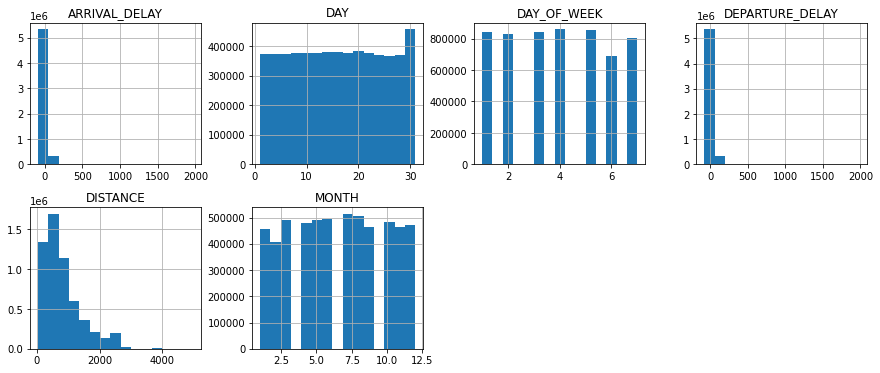

In [51]:
flight.hist(bins=15, figsize=(15, 6), layout=(2,4))

In [55]:
categorical=['MONTH','AIRLINE','ORIGIN_AIRPORT',"DESTINATION_AIRPORT"]

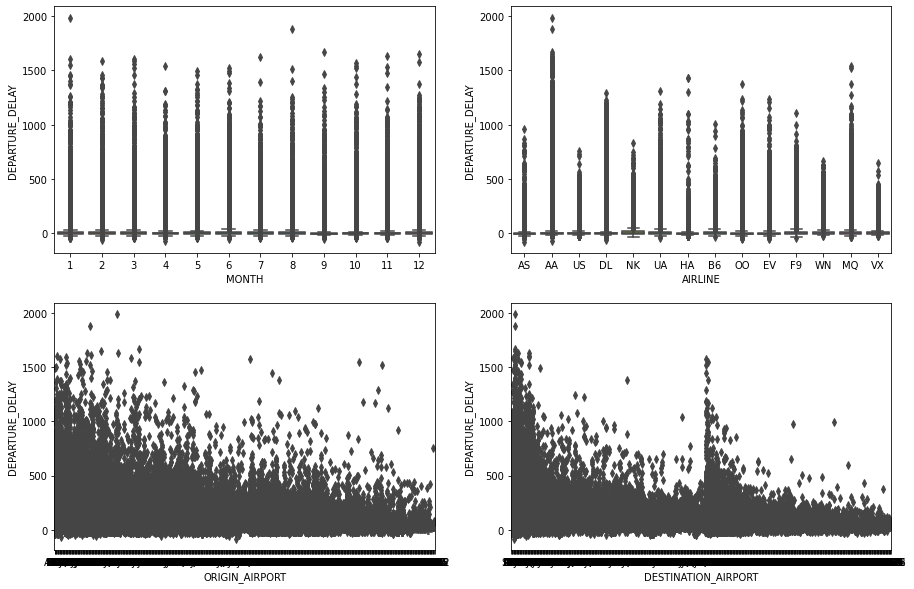

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='DEPARTURE_DELAY', data=flight, ax=subplot)

In [ ]:
plt.figure(figsize=(10,10))
cond_plot = sns.FacetGrid(data=flight, col='MONTH',hue='DAY_OF_WEEK', col_wrap=3)
cond_plot.map(sns.scatterplot, 'AIRLINE', 'DEPARTURE_DELAY');

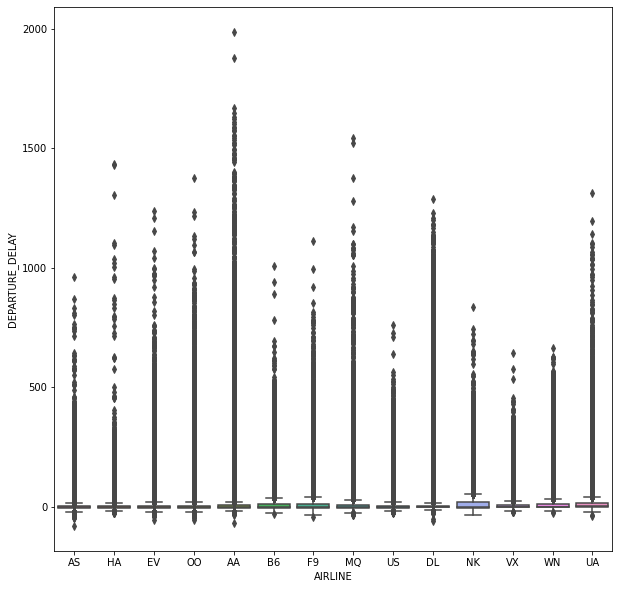

In [59]:

plt.figure(figsize=(10,10))
sorted_nb = flight.groupby(['AIRLINE'])['DEPARTURE_DELAY'].median().sort_values()
sns.boxplot(x= flight['AIRLINE'], y= flight['DEPARTURE_DELAY'], order=list(sorted_nb.index))

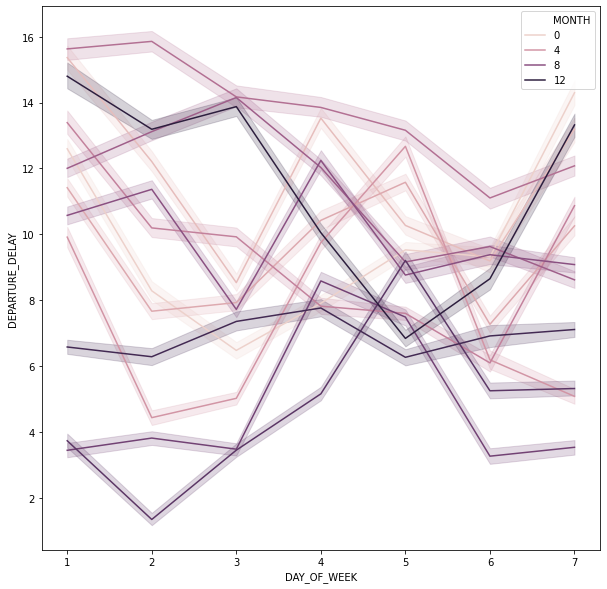

In [41]:

plt.figure(figsize=(10,10))
sns.lineplot(x=flight['DAY_OF_WEEK'],y=flight['DEPARTURE_DELAY'],hue=flight['MONTH'])

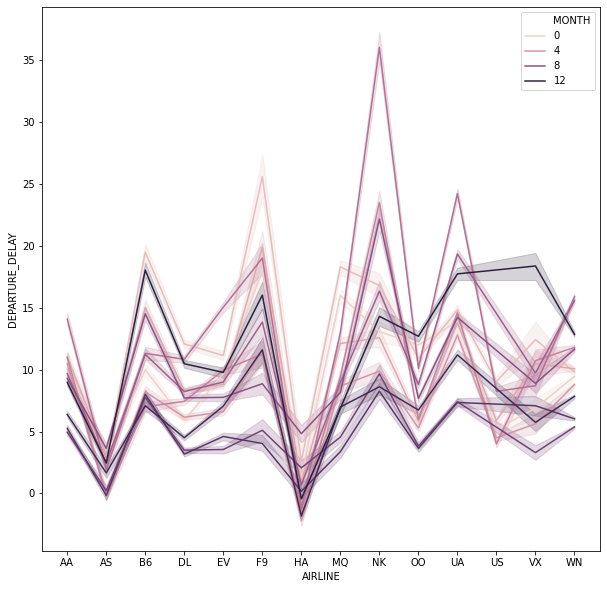

In [42]:
plt.figure(figsize=(10,10))
sns.lineplot(x=flight['AIRLINE'],y=flight['DEPARTURE_DELAY'],hue=flight['MONTH'])

In [43]:
flight.corr()

,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
MONTH,1.000000,0.005315,-0.009427,-0.021827,0.010612,-0.036793
DAY,0.005315,1.000000,0.002099,-0.000257,0.002977,-0.003097
DAY_OF_WEEK,-0.009427,0.002099,1.000000,-0.011450,0.015931,-0.017027
DEPARTURE_DELAY,-0.021827,-0.000257,-0.011450,1.000000,0.023957,0.944672
DISTANCE,0.010612,0.002977,0.015931,0.023957,1.000000,-0.025444
ARRIVAL_DELAY,-0.036793,-0.003097,-0.017027,0.944672,-0.025444,1.000000


In [ ]:
# airline.head()

In [ ]:
# airport.head()

In [ ]:
# flight_m=flight.groupby('MONTH')[['DEPARTURE_DELAY','ARRIVAL_DELAY']].mean().reset_index()

In [ ]:
# (flight_m)

In [ ]:
# sns.pairplot(flight_m,kind='reg')

In [ ]:
# sns.heatmap(flight_m.corr(),annot=True)

In [ ]:
# for key, item in flight_m:
#     print(flight_m.get_group(key), "\n\n")

In [ ]:
# aw_delay=flight.groupby('AIRLINE')

In [ ]:
# awm_delay=flight.groupby(['AIRLINE','MONTH'])

In [ ]:
# for name,group in awm_delay:
#     print (name)
#     print( group)

In [ ]:
# awm_delay.sum().reset_index()[['AIRLINE',"MONTH",'DEPARTURE_DELAY','ARRIVAL_DELAY']]

In [ ]:
# sns.pairplot(awm_delay.sum().reset_index()[["MONTH",'DEPARTURE_DELAY','ARRIVAL_DELAY']],kind='reg')

In [ ]:
# sns.pairplot(awm_delay.mean().reset_index()[["MONTH",'DEPARTURE_DELAY','ARRIVAL_DELAY']],kind='reg')

In [ ]:
# sns.heatmap(awm_delay.sum().reset_index()[["MONTH",'DEPARTURE_DELAY','ARRIVAL_DELAY']].corr(),annot=True)